In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [14]:
df = pd.read_excel("Random_leak_data_by_python.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-03-19 23:57:09.580,22.220362,17.555440,18095.837476,1.002457,23.736042,90.520816,1
1,2024-03-19 23:58:09.580,38.178473,16.504456,17337.665986,1.022310,23.643534,90.898804,0
2,2024-03-19 23:59:09.580,40.636551,15.167562,12844.363662,1.016013,23.045692,90.829612,0
3,2024-03-20 00:00:09.580,32.108980,7.294893,12493.664206,1.117639,23.429280,91.554377,1
4,2024-03-20 00:01:09.580,37.839198,17.073648,18637.472310,0.994379,23.367979,90.680205,0


In [15]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [16]:
df.describe()

,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,32.631475,14.709637,17120.234660,1.002017,23.066882,91.119195,0.24900
std,7.453580,5.823016,2903.636426,0.113768,0.407325,0.412967,0.43265
min,20.029966,5.002373,12014.294483,0.800259,22.342553,90.405319,0.00000
25%,25.828251,9.645153,14757.183517,0.902935,22.733037,90.762046,0.00000
50%,32.584079,14.653433,17208.472453,0.999760,23.063859,91.109336,0.00000
75%,39.195774,19.633735,19588.242969,1.102487,23.418566,91.480259,0.00000
max,44.982209,24.969157,21994.159679,1.199526,23.774315,91.814591,1.00000


In [17]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [18]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,22.220362,17.555440,18095.837476,1.002457
1,38.178473,16.504456,17337.665986,1.022310
2,40.636551,15.167562,12844.363662,1.016013
3,32.108980,7.294893,12493.664206,1.117639
4,37.839198,17.073648,18637.472310,0.994379


In [19]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [21]:
X_train.shape

(800, 4)

In [22]:
X_test.shape

(200, 4)

In [25]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [27]:
X_train_scaled

array([[0.6420244 , 0.57587339, 0.83486527, 0.99978854],
       [0.70073539, 0.76830139, 0.97713379, 0.3537076 ],
       [0.51063136, 0.99588486, 0.04040676, 0.23433096],
       ...,
       [0.91038818, 0.35685424, 0.77662268, 0.67575959],
       [0.70360228, 0.85030101, 0.84801772, 0.03193649],
       [0.76139835, 0.96737265, 0.08222579, 0.98922814]])

In [29]:
from keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [30]:
model = Sequential()
model.add(Dense(3, activation= 'sigmoid', input_dim = 4))
model.add(Dense(1, activation ='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [33]:
history= model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100

25/25 [==============================] - 4s 8ms/step - loss: 0.5671
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5652
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5637
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5622
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5609
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5596
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5584
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5571
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5558
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5547
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5534
Epoch 12/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5522
Epoch 13/100
25/25 [================

25/25 [==============================] - 0s 4ms/step - loss: 0.4301
Epoch 100/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4290


In [34]:
history.history

{'loss': [0.5670638680458069,
  0.5652230978012085,
  0.5637286305427551,
  0.5621770024299622,
  0.5609226226806641,
  0.559572696685791,
  0.5583725571632385,
  0.5571010112762451,
  0.5558233261108398,
  0.5547215938568115,
  0.5534151196479797,
  0.5522323250770569,
  0.5511519908905029,
  0.5497812032699585,
  0.548557460308075,
  0.547434389591217,
  0.5461161136627197,
  0.5448417663574219,
  0.5437495708465576,
  0.5422604084014893,
  0.5410789251327515,
  0.53982013463974,
  0.5384465456008911,
  0.5372530221939087,
  0.5358445644378662,
  0.5345378518104553,
  0.5331606268882751,
  0.5318481922149658,
  0.5304456949234009,
  0.5291306972503662,
  0.5276301503181458,
  0.5262744426727295,
  0.5247738361358643,
  0.5234408974647522,
  0.521952748298645,
  0.5205355286598206,
  0.519100546836853,
  0.5175783634185791,
  0.5161258578300476,
  0.5146481990814209,
  0.5131675601005554,
  0.5116724967956543,
  0.5102868676185608,
  0.5086594223976135,
  0.5072075128555298,
  0.50567

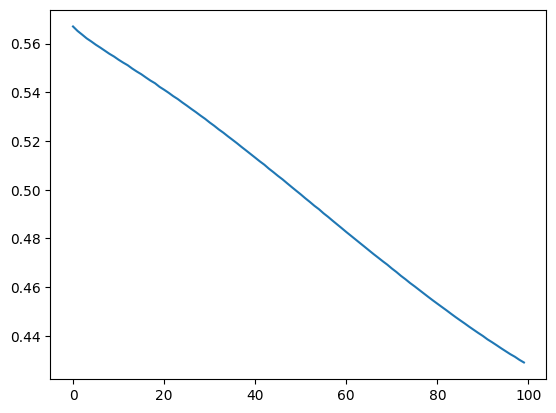

In [35]:
plt.plot(history.history['loss'])

In [36]:
model.layers[0].get_weights()

[array([[ 1.281717  ,  1.6291981 ,  1.7350711 ],
        [ 1.2007486 ,  1.9657245 ,  2.1636918 ],
        [-0.47155258, -1.2115523 , -1.4861044 ],
        [-1.7346401 , -1.4296334 , -1.7914442 ]], dtype=float32),
 array([-0.35110682, -0.5795073 , -0.31404144], dtype=float32)]

In [37]:
y_log = model.predict(X_test_scaled)

7/7 [==============================] - 0s 3ms/step


In [38]:
y_pred = np.where(y_log>0.5,1,0)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.795

# Accuracy 79.5%

# Improving Accuracy

In [40]:
model = Sequential()

model.add(Dense(11, activation= 'relu', input_dim = 4))
model.add(Dense(11, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))

# changing dense from 3 to 11
# changing activation function to relu

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                55        
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 199 (796.00 Byte)
Trainable params: 199 (796.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000

20/20 [==============================] - 3s 39ms/step - loss: 0.6531 - accuracy: 0.7469 - val_loss: 0.6293 - val_accuracy: 0.7250
Epoch 2/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.6137 - accuracy: 0.7469 - val_loss: 0.5980 - val_accuracy: 0.7250
Epoch 3/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.5856 - accuracy: 0.7469 - val_loss: 0.5782 - val_accuracy: 0.7250
Epoch 4/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7469 - val_loss: 0.5673 - val_accuracy: 0.7250
Epoch 5/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.5570 - accuracy: 0.7469 - val_loss: 0.5596 - val_accuracy: 0.7250
Epoch 6/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.5475 - accuracy: 0.7469 - val_loss: 0.5529 - val_accuracy: 0.7250
Epoch 7/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.5389 - accuracy: 0.7469 - val_loss: 0.5457 - val_accuracy: 0.7250
Epoc

20/20 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.8719 - val_loss: 0.3588 - val_accuracy: 0.8188
Epoch 57/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3039 - accuracy: 0.8687 - val_loss: 0.3569 - val_accuracy: 0.8188
Epoch 58/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3018 - accuracy: 0.8703 - val_loss: 0.3546 - val_accuracy: 0.8188
Epoch 59/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3015 - accuracy: 0.8734 - val_loss: 0.3524 - val_accuracy: 0.8188
Epoch 60/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.2982 - accuracy: 0.8703 - val_loss: 0.3503 - val_accuracy: 0.8188
Epoch 61/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2969 - accuracy: 0.8719 - val_loss: 0.3490 - val_accuracy: 0.8125
Epoch 62/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.2945 - accuracy: 0.8734 - val_loss: 0.3475 - val_accuracy: 0.8125
Epoch 63/1000

20/20 [==============================] - 0s 8ms/step - loss: 0.2162 - accuracy: 0.8969 - val_loss: 0.2662 - val_accuracy: 0.8750
Epoch 114/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2155 - accuracy: 0.8984 - val_loss: 0.2630 - val_accuracy: 0.8750
Epoch 115/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2155 - accuracy: 0.8969 - val_loss: 0.2622 - val_accuracy: 0.8875
Epoch 116/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2152 - accuracy: 0.8984 - val_loss: 0.2617 - val_accuracy: 0.8813
Epoch 117/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2144 - accuracy: 0.9000 - val_loss: 0.2624 - val_accuracy: 0.8813
Epoch 118/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.2139 - accuracy: 0.8984 - val_loss: 0.2606 - val_accuracy: 0.8750
Epoch 119/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.2135 - accuracy: 0.8984 - val_loss: 0.2622 - val_accuracy: 0.8813
Epoch 1

Epoch 170/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.9062 - val_loss: 0.2502 - val_accuracy: 0.8813
Epoch 171/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.9062 - val_loss: 0.2517 - val_accuracy: 0.8813
Epoch 172/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1994 - accuracy: 0.9078 - val_loss: 0.2494 - val_accuracy: 0.8813
Epoch 173/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.2004 - accuracy: 0.9047 - val_loss: 0.2499 - val_accuracy: 0.8813
Epoch 174/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1990 - accuracy: 0.9031 - val_loss: 0.2487 - val_accuracy: 0.8813
Epoch 175/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1990 - accuracy: 0.9031 - val_loss: 0.2518 - val_accuracy: 0.8750
Epoch 176/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1982 - accuracy: 0.9094 - val_loss: 0.2494 - val_accuracy:

Epoch 227/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1912 - accuracy: 0.9062 - val_loss: 0.2442 - val_accuracy: 0.8750
Epoch 228/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1916 - accuracy: 0.9062 - val_loss: 0.2422 - val_accuracy: 0.8750
Epoch 229/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1924 - accuracy: 0.9156 - val_loss: 0.2418 - val_accuracy: 0.8750
Epoch 230/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1908 - accuracy: 0.9094 - val_loss: 0.2428 - val_accuracy: 0.8750
Epoch 231/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1934 - accuracy: 0.9094 - val_loss: 0.2406 - val_accuracy: 0.8750
Epoch 232/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1908 - accuracy: 0.9062 - val_loss: 0.2433 - val_accuracy: 0.8750
Epoch 233/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1905 - accuracy: 0.9062 - val_loss: 0.2415 - val_accuracy:

Epoch 284/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1811 - accuracy: 0.9141 - val_loss: 0.2346 - val_accuracy: 0.8750
Epoch 285/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1811 - accuracy: 0.9156 - val_loss: 0.2344 - val_accuracy: 0.8750
Epoch 286/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1804 - accuracy: 0.9141 - val_loss: 0.2331 - val_accuracy: 0.8750
Epoch 287/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 0.9141 - val_loss: 0.2354 - val_accuracy: 0.8750
Epoch 288/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1803 - accuracy: 0.9125 - val_loss: 0.2356 - val_accuracy: 0.8750
Epoch 289/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1799 - accuracy: 0.9141 - val_loss: 0.2345 - val_accuracy: 0.8750
Epoch 290/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1807 - accuracy: 0.9125 - val_loss: 0.2355 - val_accuracy:

Epoch 341/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1706 - accuracy: 0.9187 - val_loss: 0.2268 - val_accuracy: 0.8875
Epoch 342/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1700 - accuracy: 0.9203 - val_loss: 0.2277 - val_accuracy: 0.8813
Epoch 343/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1698 - accuracy: 0.9234 - val_loss: 0.2297 - val_accuracy: 0.8813
Epoch 344/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.1692 - accuracy: 0.9250 - val_loss: 0.2264 - val_accuracy: 0.8875
Epoch 345/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1691 - accuracy: 0.9187 - val_loss: 0.2262 - val_accuracy: 0.8813
Epoch 346/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1684 - accuracy: 0.9187 - val_loss: 0.2279 - val_accuracy: 0.8813
Epoch 347/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1686 - accuracy: 0.9203 - val_loss: 0.2270 - val_accuracy

Epoch 398/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1584 - accuracy: 0.9266 - val_loss: 0.2164 - val_accuracy: 0.9062
Epoch 399/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.1602 - accuracy: 0.9297 - val_loss: 0.2175 - val_accuracy: 0.9062
Epoch 400/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.1590 - accuracy: 0.9250 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 401/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.1585 - accuracy: 0.9250 - val_loss: 0.2181 - val_accuracy: 0.8875
Epoch 402/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1584 - accuracy: 0.9281 - val_loss: 0.2151 - val_accuracy: 0.9062
Epoch 403/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1579 - accuracy: 0.9250 - val_loss: 0.2165 - val_accuracy: 0.9000
Epoch 404/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.1582 - accuracy: 0.9266 - val_loss: 0.2154 - val_accurac

Epoch 455/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1476 - accuracy: 0.9344 - val_loss: 0.2074 - val_accuracy: 0.9062
Epoch 456/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1491 - accuracy: 0.9359 - val_loss: 0.2049 - val_accuracy: 0.9062
Epoch 457/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1473 - accuracy: 0.9359 - val_loss: 0.2054 - val_accuracy: 0.9062
Epoch 458/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9328 - val_loss: 0.2069 - val_accuracy: 0.9062
Epoch 459/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1487 - accuracy: 0.9312 - val_loss: 0.2051 - val_accuracy: 0.9062
Epoch 460/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1474 - accuracy: 0.9344 - val_loss: 0.2089 - val_accuracy: 0.9000
Epoch 461/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1475 - accuracy: 0.9328 - val_loss: 0.2039 - val_accuracy:

Epoch 512/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1321 - accuracy: 0.9453 - val_loss: 0.1943 - val_accuracy: 0.9187
Epoch 513/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1338 - accuracy: 0.9422 - val_loss: 0.1992 - val_accuracy: 0.9187
Epoch 514/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1330 - accuracy: 0.9484 - val_loss: 0.1934 - val_accuracy: 0.9187
Epoch 515/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1320 - accuracy: 0.9469 - val_loss: 0.1983 - val_accuracy: 0.9187
Epoch 516/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1313 - accuracy: 0.9484 - val_loss: 0.1920 - val_accuracy: 0.9187
Epoch 517/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1317 - accuracy: 0.9453 - val_loss: 0.1991 - val_accuracy: 0.9125
Epoch 518/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1308 - accuracy: 0.9453 - val_loss: 0.1945 - val_accuracy:

Epoch 569/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1139 - accuracy: 0.9609 - val_loss: 0.1776 - val_accuracy: 0.9375
Epoch 570/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1141 - accuracy: 0.9578 - val_loss: 0.1761 - val_accuracy: 0.9312
Epoch 571/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1127 - accuracy: 0.9641 - val_loss: 0.1777 - val_accuracy: 0.9312
Epoch 572/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1134 - accuracy: 0.9609 - val_loss: 0.1762 - val_accuracy: 0.9375
Epoch 573/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.1138 - accuracy: 0.9594 - val_loss: 0.1767 - val_accuracy: 0.9312
Epoch 574/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1117 - accuracy: 0.9641 - val_loss: 0.1759 - val_accuracy: 0.9375
Epoch 575/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.1757 - val_accuracy:

Epoch 626/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1008 - accuracy: 0.9688 - val_loss: 0.1714 - val_accuracy: 0.9250
Epoch 627/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.1013 - accuracy: 0.9656 - val_loss: 0.1703 - val_accuracy: 0.9250
Epoch 628/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.1005 - accuracy: 0.9688 - val_loss: 0.1662 - val_accuracy: 0.9312
Epoch 629/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.1004 - accuracy: 0.9688 - val_loss: 0.1715 - val_accuracy: 0.9250
Epoch 630/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.1000 - accuracy: 0.9703 - val_loss: 0.1691 - val_accuracy: 0.9250
Epoch 631/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0998 - accuracy: 0.9656 - val_loss: 0.1656 - val_accuracy: 0.9312
Epoch 632/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0992 - accuracy: 0.9672 - val_loss: 0.1703 - val_accurac

Epoch 683/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0907 - accuracy: 0.9656 - val_loss: 0.1575 - val_accuracy: 0.9375
Epoch 684/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0911 - accuracy: 0.9688 - val_loss: 0.1696 - val_accuracy: 0.9250
Epoch 685/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9672 - val_loss: 0.1648 - val_accuracy: 0.9250
Epoch 686/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0909 - accuracy: 0.9734 - val_loss: 0.1636 - val_accuracy: 0.9250
Epoch 687/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0926 - accuracy: 0.9672 - val_loss: 0.1610 - val_accuracy: 0.9250
Epoch 688/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0927 - accuracy: 0.9656 - val_loss: 0.1638 - val_accuracy: 0.9312
Epoch 689/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.1680 - val_accuracy:

Epoch 740/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0860 - accuracy: 0.9719 - val_loss: 0.1571 - val_accuracy: 0.9250
Epoch 741/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0857 - accuracy: 0.9719 - val_loss: 0.1614 - val_accuracy: 0.9312
Epoch 742/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.1598 - val_accuracy: 0.9312
Epoch 743/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.1568 - val_accuracy: 0.9312
Epoch 744/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0845 - accuracy: 0.9719 - val_loss: 0.1581 - val_accuracy: 0.9250
Epoch 745/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.1622 - val_accuracy: 0.9312
Epoch 746/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.1598 - val_accura

Epoch 797/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0793 - accuracy: 0.9734 - val_loss: 0.1608 - val_accuracy: 0.9250
Epoch 798/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.1517 - val_accuracy: 0.9375
Epoch 799/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0810 - accuracy: 0.9734 - val_loss: 0.1609 - val_accuracy: 0.9250
Epoch 800/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0797 - accuracy: 0.9734 - val_loss: 0.1577 - val_accuracy: 0.9250
Epoch 801/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0786 - accuracy: 0.9734 - val_loss: 0.1545 - val_accuracy: 0.9312
Epoch 802/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0792 - accuracy: 0.9734 - val_loss: 0.1618 - val_accuracy: 0.9250
Epoch 803/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0809 - accuracy: 0.9734 - val_loss: 0.1585 - val_accurac

Epoch 854/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.9734 - val_loss: 0.1582 - val_accuracy: 0.9250
Epoch 855/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0746 - accuracy: 0.9750 - val_loss: 0.1568 - val_accuracy: 0.9312
Epoch 856/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0743 - accuracy: 0.9750 - val_loss: 0.1508 - val_accuracy: 0.9312
Epoch 857/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0764 - accuracy: 0.9719 - val_loss: 0.1557 - val_accuracy: 0.9312
Epoch 858/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0750 - accuracy: 0.9703 - val_loss: 0.1539 - val_accuracy: 0.9312
Epoch 859/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0744 - accuracy: 0.9750 - val_loss: 0.1588 - val_accuracy: 0.9312
Epoch 860/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0749 - accuracy: 0.9703 - val_loss: 0.1611 - val_accuracy:

Epoch 911/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9719 - val_loss: 0.1483 - val_accuracy: 0.9312
Epoch 912/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0728 - accuracy: 0.9719 - val_loss: 0.1500 - val_accuracy: 0.9312
Epoch 913/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0749 - accuracy: 0.9734 - val_loss: 0.1624 - val_accuracy: 0.9250
Epoch 914/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.1532 - val_accuracy: 0.9312
Epoch 915/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0698 - accuracy: 0.9719 - val_loss: 0.1581 - val_accuracy: 0.9250
Epoch 916/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.1548 - val_accuracy: 0.9250
Epoch 917/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0713 - accuracy: 0.9766 - val_loss: 0.1536 - val_accura

Epoch 968/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0664 - accuracy: 0.9766 - val_loss: 0.1475 - val_accuracy: 0.9312
Epoch 969/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0670 - accuracy: 0.9766 - val_loss: 0.1551 - val_accuracy: 0.9312
Epoch 970/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9734 - val_loss: 0.1496 - val_accuracy: 0.9312
Epoch 971/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 0.9750 - val_loss: 0.1583 - val_accuracy: 0.9312
Epoch 972/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0667 - accuracy: 0.9766 - val_loss: 0.1545 - val_accuracy: 0.9312
Epoch 973/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0673 - accuracy: 0.9766 - val_loss: 0.1509 - val_accuracy: 0.9312
Epoch 974/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.0700 - accuracy: 0.9672 - val_loss: 0.1491 - val_accuracy:

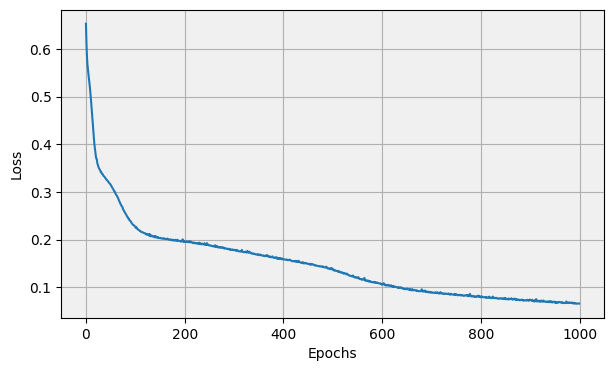

In [57]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['loss'])            # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Loss')                           # Labeling the y-axis as "Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

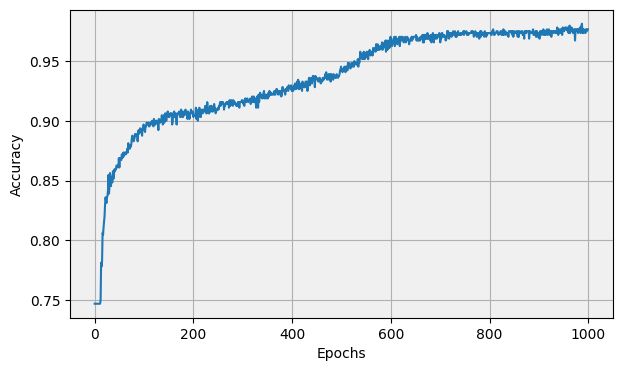

In [53]:

plt.figure(figsize=(7, 4))                      # Setting the size of the figure to 5x3
plt.plot(history.history['accuracy'])           # Plotting the training loss over epochs
plt.xlabel('Epochs')                            # Labeling the x-axis as "Epochs"
plt.ylabel('Accuracy')                          # Labeling the y-axis as "Accuracy"

plt.gca().set_facecolor('#f0f0f0')              # Setting background color to light gray
plt.grid(True)                                  # Displaying grid lines

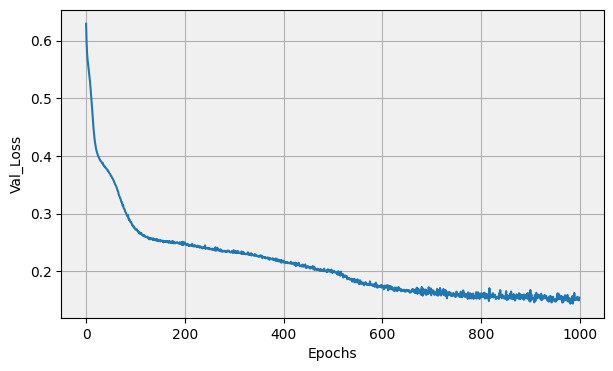

In [56]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_loss'])        # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Loss')                       # Labeling the y-axis as "Val_Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

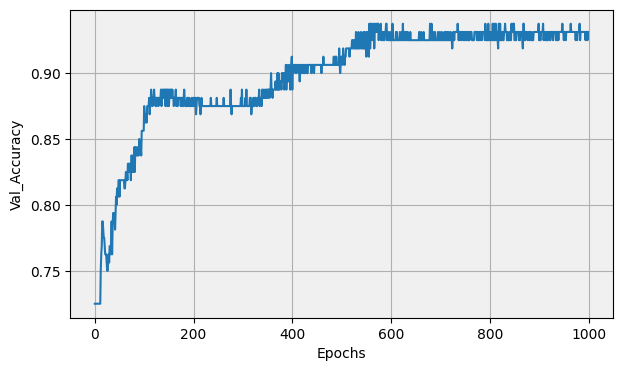

In [58]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_accuracy'])    # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Accuracy')                   # Labeling the y-axis as "Val_Accuracy"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

In [59]:
model.layers[0].get_weights()

[array([[-0.870333  ,  0.3855487 ,  1.667659  , -0.24107775,  0.36623648,
         -1.1138241 ,  0.7921861 ,  0.17787127,  0.32198948,  2.3173063 ,
          0.28201562],
        [ 2.3610475 ,  0.0833327 , -1.2144881 ,  0.40705234, -0.25603786,
          0.38402244,  1.0396402 , -0.19300033,  0.21328206, -0.57784516,
          1.9552703 ],
        [-0.08922802, -0.7373545 ,  0.42545033, -0.25046933,  0.8603906 ,
          1.0444031 ,  0.3198529 ,  1.1429858 ,  0.5313141 ,  0.17800535,
          0.080754  ],
        [ 0.3854367 , -0.76009536,  0.7307876 ,  1.0848788 ,  0.05555234,
          0.2710458 , -0.00438565, -0.70011693, -0.9266169 , -0.20005456,
          0.39689445]], dtype=float32),
 array([-0.07180882,  0.29819268,  0.20837706, -0.0096435 , -0.328234  ,
        -0.07100432,  0.76541215, -0.5861492 ,  0.648046  ,  0.34381548,
        -0.82385266], dtype=float32)]

In [60]:
model.layers[1].get_weights()

[array([[-0.32710853,  0.56551784,  0.7982778 ,  0.837687  ,  0.2953657 ,
          0.9594014 ,  1.1551881 , -0.6339802 , -1.1011362 , -0.14369369,
         -0.22469816],
        [-0.36665565,  2.7618334 ,  2.4762917 ,  2.7519257 , -2.8407903 ,
         -3.8739254 , -3.4202807 ,  0.85212004, -2.8286772 ,  0.47020608,
         -0.2562424 ],
        [-0.32866478, -0.415098  ,  0.43060794,  0.14452018,  0.25661483,
         -1.4798781 , -1.4827468 ,  0.14768043,  0.7964425 , -0.21226272,
         -0.38000715],
        [ 0.16749042, -1.2776756 , -0.96640795, -0.32928783,  1.3659642 ,
          0.46959364,  1.01594   , -0.2779364 ,  0.9679473 , -0.5044391 ,
         -0.01214731],
        [-0.30232334, -1.2798213 , -0.7270289 , -1.0612501 ,  0.74586934,
          1.4580911 ,  1.2270759 , -0.02404302,  0.468563  , -0.1894399 ,
         -0.15531021],
        [-0.01693213, -1.884494  , -0.40914536, -0.05296379, -0.3455916 ,
          0.9881428 ,  1.3178713 ,  0.32977515,  0.4588904 , -0.3160292

In [61]:
model.layers[2].get_weights()

[array([[-0.37991285],
        [-2.0562866 ],
        [-1.5050396 ],
        [-1.4045465 ],
        [ 2.079348  ],
        [ 2.250474  ],
        [ 2.6270034 ],
        [-1.8142687 ],
        [ 3.4069743 ],
        [-0.08696967],
        [-0.05614114]], dtype=float32),
 array([-0.5244116], dtype=float32)]

In [62]:
y_log = model.predict(X_test_scaled)

7/7 [==============================] - 1s 18ms/step


In [63]:
y_pred = np.where(y_log>0.5,1,0)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

# Accuracy is 96%

# Creating Confusion Matrix

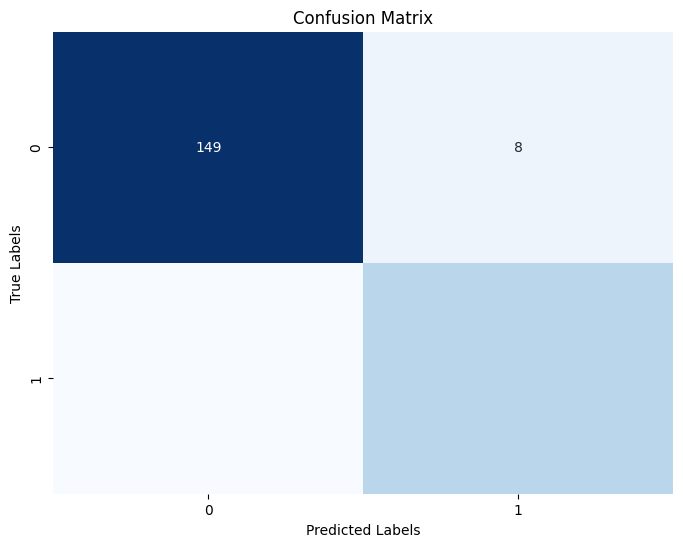

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
